# Analyze the impact of Temperature variation on Space Heating and Space Cooling

In [1]:
## importing the Necessary Libraries into the notebook
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np

%matplotlib inline

In [2]:
## read climate data from the downloaded csv file
temp_data = pd.read_csv(r'C:\Users\rahul\Desktop\Project\climate-monthly.csv')
temp_data

,x,y,LATITUDE,LONGITUDE,STATION_NAME,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,LAST_UPDATED,PROVINCE_CODE,...,DAYS_WITH_PRECIP_GE_1MM,NORMAL_SNOWFALL,TOTAL_SNOWFALL,DAYS_WITH_VALID_SNOWFALL,SNOW_ON_GROUND_LAST_DAY,NORMAL_SUNSHINE,BRIGHT_SUNSHINE,DAYS_WITH_VALID_SUNSHINE,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS
0,-89.896944,53.817778,53.818,-89.897,BIG TROUT LAKE,6010735,49488.2011.10,Oct-11,2014-07-31 11:54,ON,...,11.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,207.2
1,-89.896944,53.817778,53.818,-89.897,BIG TROUT LAKE,6010735,49488.2011.11,Nov-11,2014-07-31 11:54,ON,...,28.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,666.2
2,-89.896944,53.817778,53.818,-89.897,BIG TROUT LAKE,6010735,49488.2011.12,Dec-11,2014-07-31 11:54,ON,...,28.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,960.3
3,-89.896944,53.817778,53.818,-89.897,BIG TROUT LAKE,6010735,49488.2012.1,Jan-12,2014-07-31 11:54,ON,...,14.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1085.5
4,-89.896944,53.817778,53.818,-89.897,BIG TROUT LAKE,6010735,49488.2012.2,Feb-12,2014-07-31 11:54,ON,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34843,-77.878889,45.071389,45.071,-77.879,BANCROFT AUTO,616I001,26799.2017.8,Aug-17,2019-10-12 9:47,ON,...,10.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17.4,63.2
34844,-77.878889,45.071389,45.071,-77.879,BANCROFT AUTO,616I001,26799.2017.9,Sep-17,2019-10-12 9:48,ON,...,3.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,24.1,111.9
34845,-77.878889,45.071389,45.071,-77.879,BANCROFT AUTO,616I001,26799.2017.10,Oct-17,2019-10-12 9:46,ON,...,13.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,259.9
34846,-77.878889,45.071389,45.071,-77.879,BANCROFT AUTO,616I001,26799.2017.11,Nov-17,2019-10-12 9:46,ON,...,11.0,NaN,NaN,0.0,2.0,NaN,NaN,0.0,0.0,571.9


In [3]:
## identify the column names
temp_data.columns

Index(['x', 'y', 'LATITUDE', 'LONGITUDE', 'STATION_NAME', 'CLIMATE_IDENTIFIER',
       'ID', 'LOCAL_DATE', 'LAST_UPDATED', 'PROVINCE_CODE',
       'ENG_PROVINCE_NAME', 'FRE_PROVINCE_NAME', 'LOCAL_YEAR', 'LOCAL_MONTH',
       'NORMAL_MEAN_TEMPERATURE', 'MEDIAN_TEMPERATURE',
       'DAYS_WITH_VALID_MEAN_TEMP', 'MIN_TEMPERATURE',
       'DAYS_WITH_VALID_MIN_TEMP', 'MAX_TEMPERATURE',
       'DAYS_WITH_VALID_MAX_TEMP', 'NORMAL_PRECIPITATION',
       'TOTAL_PRECIPITATION', 'DAYS_WITH_VALID_PRECIP',
       'DAYS_WITH_PRECIP_GE_1MM', 'NORMAL_SNOWFALL', 'TOTAL_SNOWFALL',
       'DAYS_WITH_VALID_SNOWFALL', 'SNOW_ON_GROUND_LAST_DAY',
       'NORMAL_SUNSHINE', 'BRIGHT_SUNSHINE', 'DAYS_WITH_VALID_SUNSHINE',
       'COOLING_DEGREE_DAYS', 'HEATING_DEGREE_DAYS'],
      dtype='object')

In [4]:
## remove unwanted columns
temp_data = temp_data.drop(columns=['x', 'y', 'LATITUDE', 'LONGITUDE', 'CLIMATE_IDENTIFIER',
       'ID', 'LAST_UPDATED', 'FRE_PROVINCE_NAME', 'NORMAL_MEAN_TEMPERATURE', 'DAYS_WITH_VALID_MEAN_TEMP', 'MIN_TEMPERATURE',
       'DAYS_WITH_VALID_MIN_TEMP', 'MAX_TEMPERATURE',
       'DAYS_WITH_VALID_MAX_TEMP', 'NORMAL_PRECIPITATION', 'DAYS_WITH_VALID_PRECIP',
       'DAYS_WITH_PRECIP_GE_1MM', 'NORMAL_SNOWFALL',
       'DAYS_WITH_VALID_SNOWFALL', 'SNOW_ON_GROUND_LAST_DAY',
       'NORMAL_SUNSHINE', 'BRIGHT_SUNSHINE', 'DAYS_WITH_VALID_SUNSHINE',
       'COOLING_DEGREE_DAYS', 'HEATING_DEGREE_DAYS'])
temp_data

,STATION_NAME,LOCAL_DATE,PROVINCE_CODE,ENG_PROVINCE_NAME,LOCAL_YEAR,LOCAL_MONTH,MEDIAN_TEMPERATURE,TOTAL_PRECIPITATION,TOTAL_SNOWFALL
0,BIG TROUT LAKE,Oct-11,ON,ONTARIO,2011,10,0.733333,77.1,NaN
1,BIG TROUT LAKE,Nov-11,ON,ONTARIO,2011,11,-5.792857,419.3,NaN
2,BIG TROUT LAKE,Dec-11,ON,ONTARIO,2011,12,-15.113793,360.8,NaN
3,BIG TROUT LAKE,Jan-12,ON,ONTARIO,2012,1,-19.431034,130.2,NaN
4,BIG TROUT LAKE,Feb-12,ON,ONTARIO,2012,2,-15.068966,0.6,NaN
...,...,...,...,...,...,...,...,...,...
34843,BANCROFT AUTO,Aug-17,ON,ONTARIO,2017,8,16.473333,64.4,NaN
34844,BANCROFT AUTO,Sep-17,ON,ONTARIO,2017,9,14.972414,38.7,NaN
34845,BANCROFT AUTO,Oct-17,ON,ONTARIO,2017,10,9.336667,118.1,NaN
34846,BANCROFT AUTO,Nov-17,ON,ONTARIO,2017,11,-1.063333,84.4,NaN


In [5]:
## rename column names for convenience
temp_data.columns = ['Station_Name', 'Local_Date', 'Province_Code',
       'Eng_Province_Name', 'Year', 'Local_Month', 'Median_Temperature', 'Total_Precipitation', 'Total_Snowfall']
temp_data

,Station_Name,Local_Date,Province_Code,Eng_Province_Name,Year,Local_Month,Median_Temperature,Total_Precipitation,Total_Snowfall
0,BIG TROUT LAKE,Oct-11,ON,ONTARIO,2011,10,0.733333,77.1,NaN
1,BIG TROUT LAKE,Nov-11,ON,ONTARIO,2011,11,-5.792857,419.3,NaN
2,BIG TROUT LAKE,Dec-11,ON,ONTARIO,2011,12,-15.113793,360.8,NaN
3,BIG TROUT LAKE,Jan-12,ON,ONTARIO,2012,1,-19.431034,130.2,NaN
4,BIG TROUT LAKE,Feb-12,ON,ONTARIO,2012,2,-15.068966,0.6,NaN
...,...,...,...,...,...,...,...,...,...
34843,BANCROFT AUTO,Aug-17,ON,ONTARIO,2017,8,16.473333,64.4,NaN
34844,BANCROFT AUTO,Sep-17,ON,ONTARIO,2017,9,14.972414,38.7,NaN
34845,BANCROFT AUTO,Oct-17,ON,ONTARIO,2017,10,9.336667,118.1,NaN
34846,BANCROFT AUTO,Nov-17,ON,ONTARIO,2017,11,-1.063333,84.4,NaN


In [6]:
## find the missing values in Median_Temperature column
temp_data['Median_Temperature'].isnull().sum()

292

In [7]:
## find the missing values in Total_Precipitation column
temp_data['Total_Precipitation'].isnull().sum()

3205

In [8]:
## find the missing values in Total_Snowfall column
temp_data['Total_Snowfall'].isnull().sum()

15277

In [9]:
## treat the missing values
## replace blank values by nan
temp_data['Median_Temperature'].replace('', np.nan, inplace=True)
temp_data['Total_Precipitation'].replace('', np.nan, inplace=True)
temp_data['Total_Snowfall'].replace('', np.nan, inplace=True)

In [10]:
## treating missing values by imputing values to each column by column median
temp_data.fillna(temp_data.median(), inplace=True)

In [11]:
## confirm if there are any missing values present after treating
temp_data.isnull().sum()

Station_Name           0
Local_Date             0
Province_Code          0
Eng_Province_Name      0
Year                   0
Local_Month            0
Median_Temperature     0
Total_Precipitation    0
Total_Snowfall         0
dtype: int64

In [12]:
## groupby the Median_Temperature data according to year
tempdata_median = temp_data[['Year',\
             'Median_Temperature',\
             ]].groupby('Year')
tempdata_median

In [13]:
## find mean of the temperature data
temp_mean = tempdata_median.aggregate(np.mean)
temp_mean

,Median_Temperature
Year,
1990,6.542658
1991,6.717020
1992,4.863102
1993,4.973063
1994,5.298177
1995,5.462708
1996,4.828686
1997,5.063634
1998,7.617880


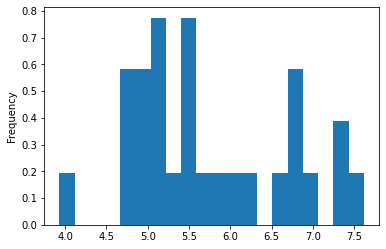

In [14]:
## plot histogram for temperature data
temp_mean['Median_Temperature'].plot.hist(bins=20, density=True)

In [15]:
## find median of the temperature data
temp_median = tempdata_median.aggregate(np.median)
temp_median

,Median_Temperature
Year,
1990,7.442688
1991,8.143889
1992,5.011290
1993,5.843328
1994,7.266667
1995,5.296667
1996,4.988932
1997,5.221667
1998,7.823333


In [16]:
## read the excel file containing energy usage data
energy_data = pd.read_excel(r'C:\Users\rahul\Desktop\Project\res_on_e_2.xls')
energy_data

,Year,Space Heating,Space Cooling
0,1990,356.232442,7.838189
1,1991,350.549488,11.642066
2,1992,373.540842,3.345960
3,1993,392.700290,7.712715
4,1994,405.638557,7.543003
5,1995,386.889318,10.586833
6,1996,413.070452,7.719142
7,1997,389.340139,8.209026
8,1998,315.659827,13.801398
9,1999,336.420594,16.337800


In [17]:
energy_data.columns = ['Year', 'Space_Heating', 'Space_Cooling']
energy_data

,Year,Space_Heating,Space_Cooling
0,1990,356.232442,7.838189
1,1991,350.549488,11.642066
2,1992,373.540842,3.345960
3,1993,392.700290,7.712715
4,1994,405.638557,7.543003
5,1995,386.889318,10.586833
6,1996,413.070452,7.719142
7,1997,389.340139,8.209026
8,1998,315.659827,13.801398
9,1999,336.420594,16.337800


In [18]:
## merge the temperature data with energy data for corresponding years

merged_df = temp_median.merge(energy_data, on='Year')
merged_df

,Year,Median_Temperature,Space_Heating,Space_Cooling
0,1990,7.442688,356.232442,7.838189
1,1991,8.143889,350.549488,11.642066
2,1992,5.011290,373.540842,3.345960
3,1993,5.843328,392.700290,7.712715
4,1994,7.266667,405.638557,7.543003
5,1995,5.296667,386.889318,10.586833
6,1996,4.988932,413.070452,7.719142
7,1997,5.221667,389.340139,8.209026
8,1998,7.823333,315.659827,13.801398
9,1999,7.045747,336.420594,16.337800


In [19]:
# setting index for the merged data
merged_df.set_index ('Year')

,Median_Temperature,Space_Heating,Space_Cooling
Year,,,
1990,7.442688,356.232442,7.838189
1991,8.143889,350.549488,11.642066
1992,5.011290,373.540842,3.345960
1993,5.843328,392.700290,7.712715
1994,7.266667,405.638557,7.543003
1995,5.296667,386.889318,10.586833
1996,4.988932,413.070452,7.719142
1997,5.221667,389.340139,8.209026
1998,7.823333,315.659827,13.801398


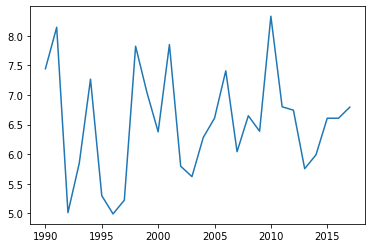

In [20]:
# plotting line graph for the variable Median Temperature
plt.figure()
x = merged_df['Year']
y = merged_df['Median_Temperature']
plt.plot(x,y)

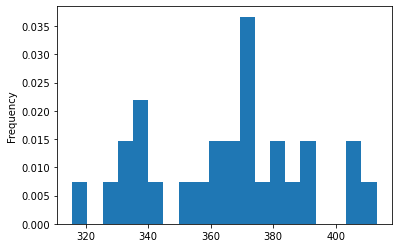

In [21]:
# drawing histogram for Space Heating
merged_df['Space_Heating'].plot.hist(bins=20, density=True)

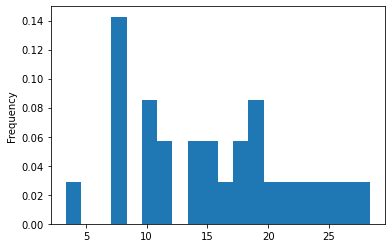

In [22]:
# drawing histogram for Space Cooling
merged_df['Space_Cooling'].plot.hist(bins=20, density=True)

Text(0.5, 0, 'Space_Heating')

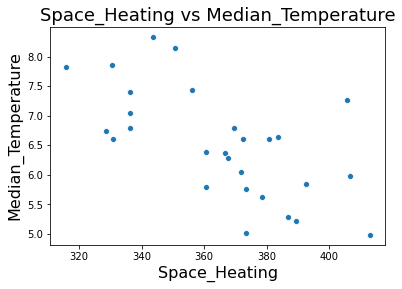

In [23]:
# scatterplot between Space Heating and Median Temperature
sns.scatterplot('Space_Heating','Median_Temperature',data=merged_df)
plt.title('Space_Heating vs Median_Temperature', fontsize=18)
plt.ylabel('Median_Temperature', fontsize=16)
plt.xlabel('Space_Heating', fontsize=16)

Text(0.5, 0, 'Space_Cooling')

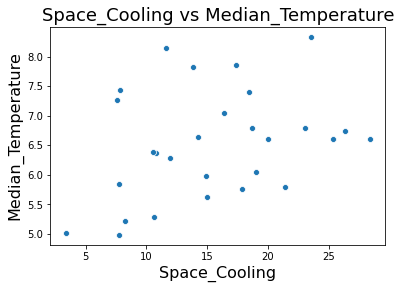

In [24]:
# scatterplot between Space Cooling and Median Temperature
sns.scatterplot('Space_Cooling','Median_Temperature',data=merged_df)
plt.title('Space_Cooling vs Median_Temperature', fontsize=18)
plt.ylabel('Median_Temperature', fontsize=16)
plt.xlabel('Space_Cooling', fontsize=16)

In [25]:
# importing Library for scatter matrix
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000288DB972730>,
      dtype=object)

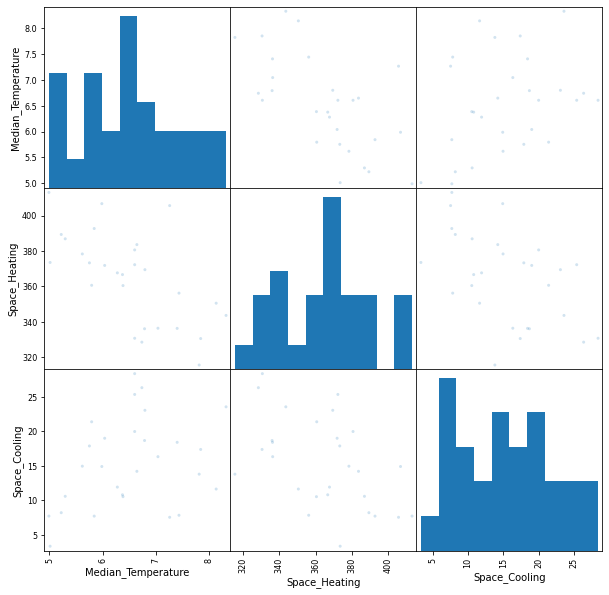

In [26]:
# plotting Scatter matrix between Median Temeperature, Space heating and Space Cooling
scatter_df = merged_df.drop(columns=["Year"])
scatter_matrix(scatter_df, alpha=0.2, figsize=(10, 10))

In [27]:
## find covariance of the merged data

merged_df.cov()

,Year,Median_Temperature,Space_Heating,Space_Cooling
Year,67.666667,0.486816,-44.942187,39.935144
Median_Temperature,0.486816,0.848003,-15.128768,1.943699
Space_Heating,-44.942187,-15.128768,665.032596,-82.433979
Space_Cooling,39.935144,1.943699,-82.433979,42.489479


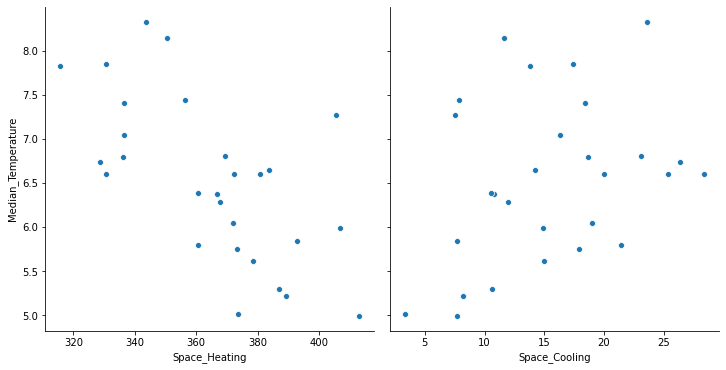

In [28]:
sns.pairplot(merged_df, x_vars=['Space_Heating', 'Space_Cooling'], y_vars='Median_Temperature', height=5)

In [29]:
## split the data for training/testing

train_set, test_set= np.split(merged_df, [int(.5 *len(merged_df))])

In [30]:
## create dataframe for Median_Temperature and Space_Heating

df1 = train_set[["Median_Temperature","Space_Heating"]].copy()
df1

,Median_Temperature,Space_Heating
0,7.442688,356.232442
1,8.143889,350.549488
2,5.011290,373.540842
3,5.843328,392.700290
4,7.266667,405.638557
5,5.296667,386.889318
6,4.988932,413.070452
7,5.221667,389.340139
8,7.823333,315.659827
9,7.045747,336.420594


In [31]:
## create a fitted model for Space_Heating training data

lm1 = smf.ols(formula='Space_Heating ~ Median_Temperature', data=df1).fit()
lm1.params

Intercept             477.588355
Median_Temperature    -17.050641
dtype: float64

In [32]:
## OLS regression results for lm1
lm1.summary()

C:\Users\rahul\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Space_Heating   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     10.68
Date:                Mon, 09 Nov 2020   Prob (F-statistic):            0.00672
Time:                        22:01:09   Log-Likelihood:                -61.842
No. Observations:                  14   AIC:                             127.7
Df Residuals:                      12   BIC:                             129.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            477.5884     33.930     14.076      0.000     403.660     551.516
Median_Temperature   -17.0506      5.217     -3.269      0.007     -28.416      -5.685
==============================================================================
Omnibus:                        5.318   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                2.475
Skew:                           0.945   Prob(JB):                        0.290
Kurtosis:                       3.820   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
## create dataframe for Median_Temperature and Space_Cooling

df2 = train_set[["Median_Temperature","Space_Cooling"]].copy()
df2

,Median_Temperature,Space_Cooling
0,7.442688,7.838189
1,8.143889,11.642066
2,5.011290,3.345960
3,5.843328,7.712715
4,7.266667,7.543003
5,5.296667,10.586833
6,4.988932,7.719142
7,5.221667,8.209026
8,7.823333,13.801398
9,7.045747,16.337800


In [34]:
## create a fitted model for Space_Cooling training data

lm2 = smf.ols(formula='Space_Cooling ~ Median_Temperature', data=df2).fit()
lm2.params

Intercept             2.848532
Median_Temperature    1.330788
dtype: float64

In [35]:
lm2.summary()

C:\Users\rahul\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Space_Cooling   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.313
Date:                Mon, 09 Nov 2020   Prob (F-statistic):              0.274
Time:                        22:01:09   Log-Likelihood:                -40.809
No. Observations:                  14   AIC:                             85.62
Df Residuals:                      12   BIC:                             86.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8485      7.553      0.377      0.713     -13.608      19.305
Median_Temperature     1.3308      1.161      1.146      0.274      -1.199       3.861
==============================================================================
Omnibus:                        3.102   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.495
Skew:                           0.796   Prob(JB):                        0.474
Kurtosis:                       3.164   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# splitting the data into test and train
x_train = train_set['Median_Temperature']
y_train = train_set['Space_Heating']
z_train = train_set['Space_Cooling']
x_test = test_set['Median_Temperature']
y_test = test_set['Space_Heating']
z_test = test_set['Space_Cooling']

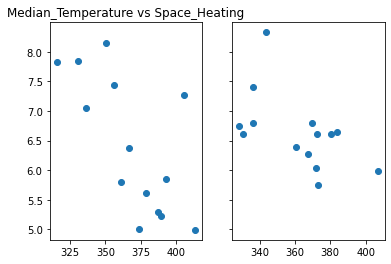

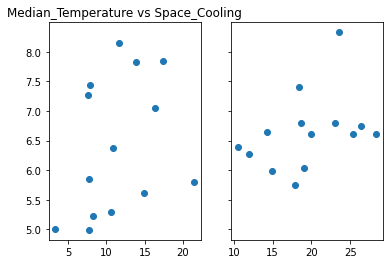

In [37]:
## plot scatter graph for train and test data

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(train_set.Space_Heating, train_set.Median_Temperature)
ax1.set_title('Median_Temperature vs Space_Heating')
ax2.scatter(test_set.Space_Heating, test_set.Median_Temperature)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(train_set.Space_Cooling, train_set.Median_Temperature)
ax1.set_title('Median_Temperature vs Space_Cooling')
ax2.scatter(test_set.Space_Cooling, test_set.Median_Temperature)

In [38]:
## Using Scikit Learn ran a regression on training data for learning

model = LinearRegression()

In [39]:
model.fit(x_train[:,np.newaxis],y_train)
print (model.coef_)
print (model.intercept_)

[-17.05064118]
477.58835472430553


In [40]:
y_pred = lm1.predict(x_test)
print (y_pred)
print (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

14    370.510328
15    364.942285
16    351.275188
17    374.589852
18    364.230989
19    368.693623
20    335.548358
21    361.643995
22    362.624897
23    379.490332
24    375.504516
25    364.942285
26    364.942285
27    361.761585
dtype: float64
19.10136039777376


In [41]:
model.fit(x_train[:,np.newaxis],z_train)
print (model.coef_)
print (model.intercept_)

[1.33078808]
2.848531717289429


In [42]:
# data frame for test data
df3 = test_set[["Median_Temperature","Space_Heating"]].copy()
df3

,Median_Temperature,Space_Heating
14,6.280000,367.675439
15,6.606559,372.285346
16,7.408118,336.333670
17,6.040741,371.866516
18,6.648276,383.618116
19,6.386548,360.490446
20,8.330478,343.651871
21,6.800000,369.463600
22,6.742471,328.562587
23,5.753333,373.320993


In [43]:
# running regression on test data
lm3 = smf.ols(formula='Space_Heating ~ Median_Temperature', data=df3).fit()
lm3.params

Intercept             491.804139
Median_Temperature    -19.612420
dtype: float64

In [44]:
## using the regression ran on test data forecasting value for future Space heating values for corresponding Median temperature values
x_new = pd.DataFrame({'Median_Temperature': [7,5,6,5.5]})

lm3.predict(x_new)

0    354.517196
1    393.742037
2    374.129617
3    383.935827
dtype: float64

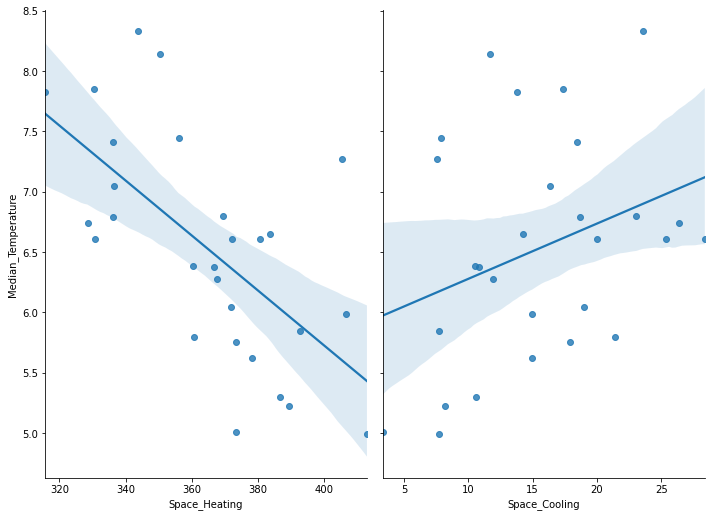

In [45]:
## plot the least square lines

sns.pairplot(merged_df, x_vars=['Space_Heating', 'Space_Cooling'], y_vars='Median_Temperature', height=7, aspect=0.7, kind='reg')

In [46]:
lm1.conf_int()

,0,1
Intercept,403.660337,551.516372
Median_Temperature,-28.416444,-5.684838


In [47]:
lm1.pvalues

Intercept             8.025976e-09
Median_Temperature    6.720753e-03
dtype: float64

In [48]:
lm2.pvalues

Intercept             0.712648
Median_Temperature    0.274109
dtype: float64

### Looking at the models we decided to drop the model between Space Cooling and Median Temperature since the model is not a good fit and also the variable median temperature is not statistically significant.

### For the model with Space Heating and Median temperature, R value is small, hence the model is not a good fit. However, since the independent variable Median Temperature is statistically significant, we decided to keep the model and continue expanding the model with more independent variables like Precipitation, Snowfall, Wind Chill etc.

## Regression after adding Total Precipitation and Snowfall.

In [49]:
## grouping the data by year
data = temp_data[['Year',\
             'Median_Temperature',\
             'Total_Precipitation',\
             'Total_Snowfall',\
             ]].groupby('Year')
data

In [50]:
## taking Median values of required variables for each year
data_median = data.aggregate(np.median)
data_median

,Median_Temperature,Total_Precipitation,Total_Snowfall
Year,,,
1990,7.442688,75.80,1.35
1991,8.143889,69.00,1.00
1992,5.011290,73.95,4.20
1993,5.843328,63.60,1.00
1994,7.266667,63.60,1.00
1995,5.296667,63.60,1.00
1996,4.988932,72.95,1.00
1997,5.221667,63.60,1.00
1998,7.823333,59.80,1.00


In [51]:
## merging the data
df = data_median.merge(energy_data, on='Year')
df

,Year,Median_Temperature,Total_Precipitation,Total_Snowfall,Space_Heating,Space_Cooling
0,1990,7.442688,75.80,1.35,356.232442,7.838189
1,1991,8.143889,69.00,1.00,350.549488,11.642066
2,1992,5.011290,73.95,4.20,373.540842,3.345960
3,1993,5.843328,63.60,1.00,392.700290,7.712715
4,1994,7.266667,63.60,1.00,405.638557,7.543003
5,1995,5.296667,63.60,1.00,386.889318,10.586833
6,1996,4.988932,72.95,1.00,413.070452,7.719142
7,1997,5.221667,63.60,1.00,389.340139,8.209026
8,1998,7.823333,59.80,1.00,315.659827,13.801398
9,1999,7.045747,63.60,1.00,336.420594,16.337800


In [52]:
## setting index
df.set_index ('Year')

,Median_Temperature,Total_Precipitation,Total_Snowfall,Space_Heating,Space_Cooling
Year,,,,,
1990,7.442688,75.80,1.35,356.232442,7.838189
1991,8.143889,69.00,1.00,350.549488,11.642066
1992,5.011290,73.95,4.20,373.540842,3.345960
1993,5.843328,63.60,1.00,392.700290,7.712715
1994,7.266667,63.60,1.00,405.638557,7.543003
1995,5.296667,63.60,1.00,386.889318,10.586833
1996,4.988932,72.95,1.00,413.070452,7.719142
1997,5.221667,63.60,1.00,389.340139,8.209026
1998,7.823333,59.80,1.00,315.659827,13.801398


In [53]:
# splitting the data into train and test data
train_data, test_data= np.split(df, [int(.5 *len(df))])

In [54]:
# train data for Space Heating
df4 = train_data[["Median_Temperature", "Total_Precipitation","Total_Snowfall", "Space_Heating"]].copy()
df4

,Median_Temperature,Total_Precipitation,Total_Snowfall,Space_Heating
0,7.442688,75.80,1.35,356.232442
1,8.143889,69.00,1.00,350.549488
2,5.011290,73.95,4.20,373.540842
3,5.843328,63.60,1.00,392.700290
4,7.266667,63.60,1.00,405.638557
5,5.296667,63.60,1.00,386.889318
6,4.988932,72.95,1.00,413.070452
7,5.221667,63.60,1.00,389.340139
8,7.823333,59.80,1.00,315.659827
9,7.045747,63.60,1.00,336.420594


In [55]:
lm4 = smf.ols(formula='Space_Heating ~ Median_Temperature + Total_Precipitation + Total_Snowfall', data=df4).fit()
lm4.params

Intercept              378.551966
Median_Temperature     -18.710492
Total_Precipitation      1.897668
Total_Snowfall         -12.540752
dtype: float64

In [56]:
lm4.summary()

C:\Users\rahul\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Space_Heating   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     4.619
Date:                Mon, 09 Nov 2020   Prob (F-statistic):             0.0282
Time:                        22:01:11   Log-Likelihood:                -60.213
No. Observations:                  14   AIC:                             128.4
Df Residuals:                      10   BIC:                             131.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             378.5520     97.342      3.889      0.003     161.661     595.443
Median_Temperature    -18.7105      5.373     -3.483      0.006     -30.682      -6.739
Total_Precipitation     1.8977      1.437      1.321      0.216      -1.304       5.099
Total_Snowfall        -12.5408      8.459     -1.482      0.169     -31.389       6.308
==============================================================================
Omnibus:                       18.436   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.117
Skew:                           1.887   Prob(JB):                     0.000316
Kurtosis:                       6.658   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# train data for Space Cooling
df5 = train_data[["Median_Temperature", "Total_Precipitation", "Total_Snowfall", "Space_Cooling"]].copy()
df5

,Median_Temperature,Total_Precipitation,Total_Snowfall,Space_Cooling
0,7.442688,75.80,1.35,7.838189
1,8.143889,69.00,1.00,11.642066
2,5.011290,73.95,4.20,3.345960
3,5.843328,63.60,1.00,7.712715
4,7.266667,63.60,1.00,7.543003
5,5.296667,63.60,1.00,10.586833
6,4.988932,72.95,1.00,7.719142
7,5.221667,63.60,1.00,8.209026
8,7.823333,59.80,1.00,13.801398
9,7.045747,63.60,1.00,16.337800


In [58]:
lm5 = smf.ols(formula='Space_Cooling ~ Median_Temperature + Total_Precipitation + Total_Snowfall', data=df5).fit()
lm5.params

Intercept              33.720868
Median_Temperature      0.735456
Total_Precipitation    -0.383497
Total_Snowfall         -1.368804
dtype: float64

In [59]:
lm5.summary()

C:\Users\rahul\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Space_Cooling   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     2.016
Date:                Mon, 09 Nov 2020   Prob (F-statistic):              0.176
Time:                        22:01:11   Log-Likelihood:                -38.224
No. Observations:                  14   AIC:                             84.45
Df Residuals:                      10   BIC:                             87.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              33.7209     20.239      1.666      0.127     -11.374      78.816
Median_Temperature      0.7355      1.117      0.658      0.525      -1.754       3.224
Total_Precipitation    -0.3835      0.299     -1.284      0.228      -1.049       0.282
Total_Snowfall         -1.3688      1.759     -0.778      0.454      -5.288       2.550
==============================================================================
Omnibus:                        3.537   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                1.495
Skew:                           0.766   Prob(JB):                        0.474
Kurtosis:                       3.467   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## After including more variables to the model, it is seen that the model with Space Cooling did not improve hence we are not further exploring that model.

## For model with Space heating even though the R value improved, it is still not a best fit and also variables like precipitation and snowfall were not statistically significant.


## The data for windchill was not available for Ontario. Hence we could not include that in the model.

## More analysis is being done considering geographical location as sample, area of space that require heating etc.



# Thank You